In [1]:
import os
import pandas as pd
from data.visualize import visualize_dataset
import numpy as np

Warning - Certain functionality 
             requires requests_html, which is not installed.
             
             Install using: 
             pip install requests_html
             
             After installation, you may have to restart your Python session.


In [2]:
def get_stock_df(df_all: pd.DataFrame, stock: str) -> pd.DataFrame:
    df = df_all[df_all['stock'] == stock]
    return df

In [50]:
def load_data_file(csv_file):
    if not os.path.exists(csv_file):
        raise FileNotFoundError(
            f"Please run data_fetcher.py to download the data first.")
    else:
        df = pd.read_csv(csv_file)
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)
    return df
df_all = load_data_file("data/stock_testing_2023-01-01_2024-12-31.csv")

['TSLA' 'AAPL' 'GOOGL' 'AMZN' 'MSFT' 'META' 'NVDA']


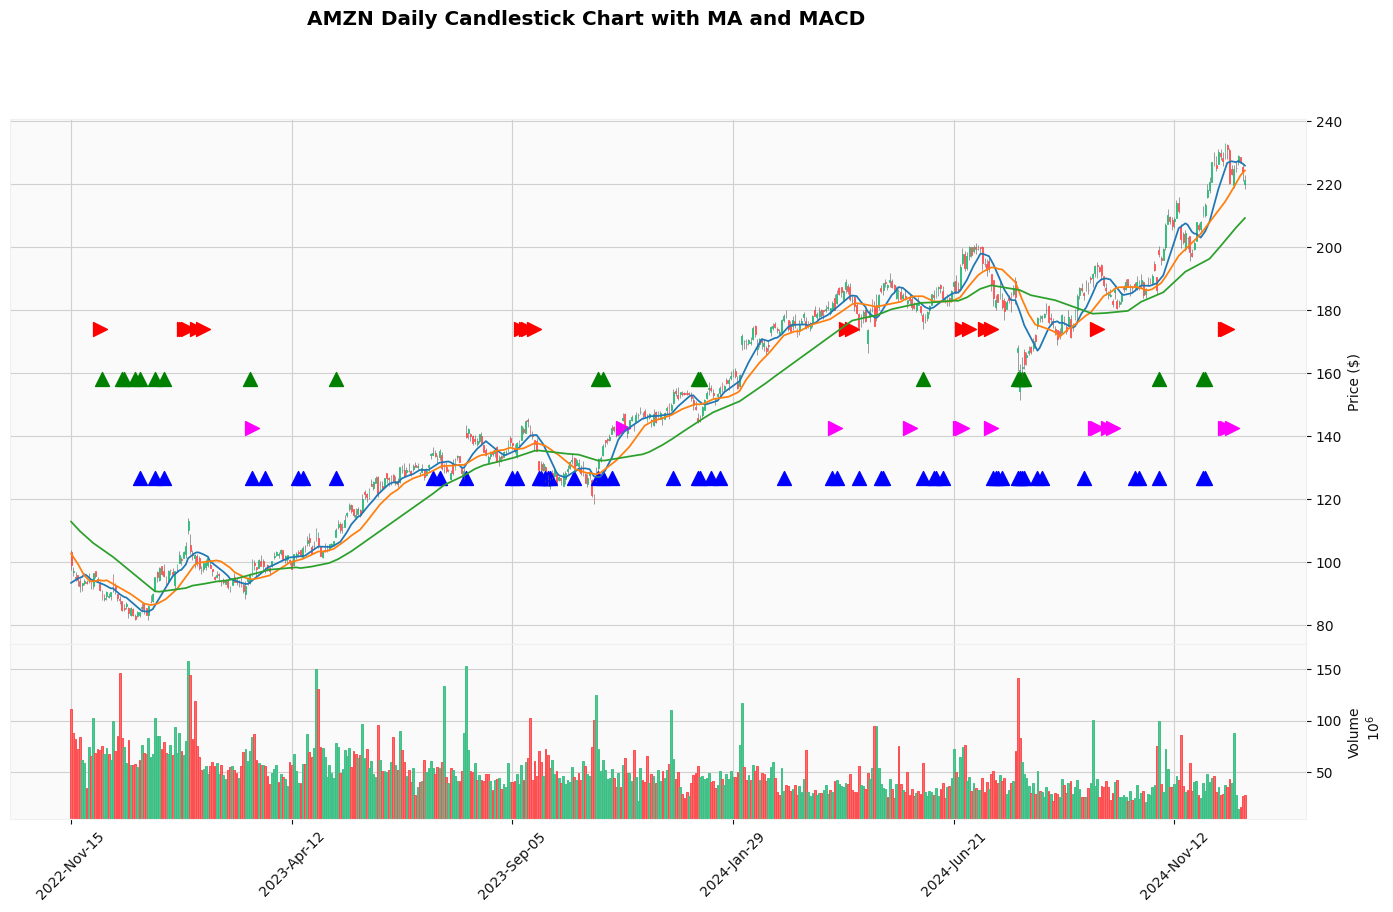

In [51]:
stock = "AMZN"

print(df_all["stock"].unique())
df_test = get_stock_df(df_all, stock)
        
visualize_dataset(df_test,
                stock=stock,
                viz_labels=["trend_30days+", "trend_30days-"],
                viz_pred=True,
                plot_macd=False)

In [52]:
from feature.feature import create_batch_feature, feature_names
from data.label import label_columns, label_feature

In [53]:
features, labels, dates = create_batch_feature(df_test)

Positive labels: [14 17 15 18 17 18]


In [55]:
def get_false_predictions(df, label_name, positive=True):
    pred = 1 if positive else 0
    row_indices = df.index[df[label_name+"_pred"] == pred]
    gt_labels = df[label_name].loc[row_indices]   
    
    dates_correct, dates_false = [], []
    for date, gt in gt_labels.items():
        if not np.isnan(gt) and gt == pred:
            dates_correct.append(date.strftime("%Y-%m-%d"))
        if not np.isnan(gt) and gt != pred:
            dates_false.append(date.strftime("%Y-%m-%d"))
    return dates_correct, dates_false
    

dates_tp, dates_fp = get_false_predictions(df_test, "trend_30days-", positive=True)
print("True positives: ")
print(dates_tp)
print("False positives: ")
print(dates_fp)

dates_tn, dates_fn = get_false_predictions(df_test, "trend_30days-", positive=False)
# print("True negatives: ") # Too many negatives
# print(dates_tn)
print("False negatives: ")
print(dates_fn)

True positives: 
['2024-06-27', '2024-07-17', '2024-09-24', '2024-12-16', '2024-12-17']
False positives: 
['2023-03-16', '2023-11-14', '2024-04-04', '2024-05-22', '2024-06-26', '2024-09-23', '2024-10-01', '2024-10-03', '2024-12-19']
False negatives: 
['2023-01-31', '2023-02-01', '2023-02-02', '2023-02-08', '2023-02-13', '2023-09-11', '2023-09-13', '2023-09-14', '2023-09-19', '2024-04-11', '2024-04-16', '2024-07-02', '2024-07-12']


In [34]:
columns = df_test.columns
columns = [column for column in columns if "trend" in column or column in feature_names[18:]]
display(df_test.loc[['2023-11-01', '2023-11-07'], columns[6:-12]])

,MA_10_50_Crossover_Signal_-1,MA_10_50_Crossover_Signal_0,MA_10_50_Crossover_Signal_1,MA_5_20_Crossover_Signal_-1,MA_5_20_Crossover_Signal_0,MA_5_20_Crossover_Signal_1,MACD_Crossover_Signal_-1,MACD_Crossover_Signal_0,MACD_Crossover_Signal_1,RSI_Over_Bought_Signal_-1,RSI_Over_Bought_Signal_0,RSI_Over_Bought_Signal_1,BB_Signal_-1,BB_Signal_0,BB_Signal_1
Date,,,,,,,,,,,,,,,
2023-11-01,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0
2023-11-07,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0


In [35]:
columns = df_test.columns
columns = [column for column in columns if "trend" in column or column in feature_names[18:]]
display(df_test.loc[['2023-03-15', '2023-03-16'], columns[6:-12]])

,MA_10_50_Crossover_Signal_-1,MA_10_50_Crossover_Signal_0,MA_10_50_Crossover_Signal_1,MA_5_20_Crossover_Signal_-1,MA_5_20_Crossover_Signal_0,MA_5_20_Crossover_Signal_1,MACD_Crossover_Signal_-1,MACD_Crossover_Signal_0,MACD_Crossover_Signal_1,RSI_Over_Bought_Signal_-1,RSI_Over_Bought_Signal_0,RSI_Over_Bought_Signal_1,BB_Signal_-1,BB_Signal_0,BB_Signal_1
Date,,,,,,,,,,,,,,,
2023-03-15,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0
2023-03-16,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0


In [36]:
columns = df_test.columns
columns = [column for column in columns if "trend" in column or column in feature_names[18:]]
display(df_test.loc[['2023-05-10', '2023-04-17'], columns[6:-12]])

,MA_10_50_Crossover_Signal_-1,MA_10_50_Crossover_Signal_0,MA_10_50_Crossover_Signal_1,MA_5_20_Crossover_Signal_-1,MA_5_20_Crossover_Signal_0,MA_5_20_Crossover_Signal_1,MACD_Crossover_Signal_-1,MACD_Crossover_Signal_0,MACD_Crossover_Signal_1,RSI_Over_Bought_Signal_-1,RSI_Over_Bought_Signal_0,RSI_Over_Bought_Signal_1,BB_Signal_-1,BB_Signal_0,BB_Signal_1
Date,,,,,,,,,,,,,,,
2023-05-10,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0
2023-04-17,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0


In [49]:
df_test[(df_test["RSI_Over_Bought_Signal_-1"] == 1) & (df_test["trend_30days+"] == 1)][columns]

,trend_10days+,trend_10days-,trend_20days+,trend_20days-,trend_30days+,trend_30days-,MA_10_50_Crossover_Signal_-1,MA_10_50_Crossover_Signal_0,MA_10_50_Crossover_Signal_1,MA_5_20_Crossover_Signal_-1,...,trend_20days+_pred,trend_20days-_pred,trend_30days+_pred,trend_30days-_pred,trend_10days+_prob,trend_10days-_prob,trend_20days+_prob,trend_20days-_prob,trend_30days+_prob,trend_30days-_prob
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-11,0.0,0.0,1.0,0.0,1.0,0.0,0,1,0,0,...,1.0,0.0,1.0,1.0,0.515209,0.409789,0.530405,0.432512,0.610310,0.506823
2023-05-10,1.0,0.0,1.0,0.0,1.0,0.0,0,1,0,0,...,1.0,0.0,1.0,0.0,0.510192,0.405860,0.543844,0.431832,0.612803,0.495788
